# Linear regression

In this exercise, we will find out effect of advertisements on sales.

In this excercise, we will use three different advertisement approaches: TV, Radio and newspaper.

For this we will apply Univariate Linear Regression

### Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Read data and display top rows

In [52]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Remove extra column

In [53]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Simple linear regression 

### Plot TV vs Sales data

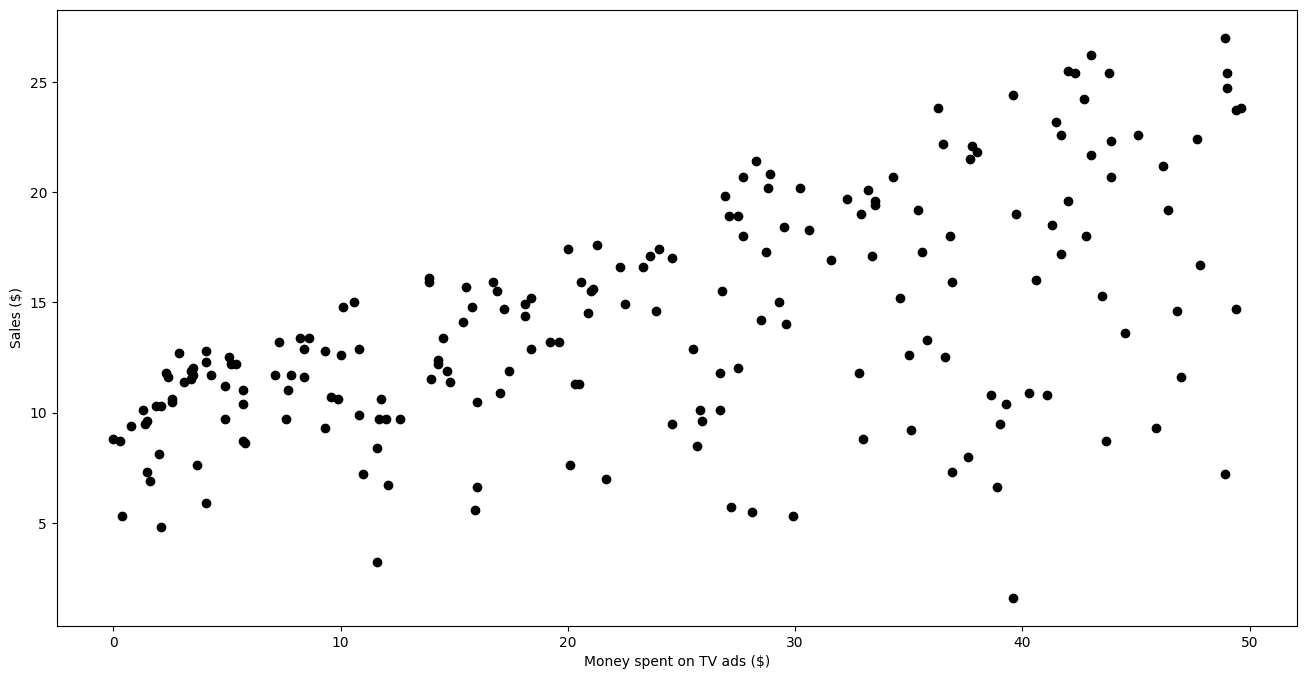

In [54]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['radio'],
    data['sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

### Perform linear regression

In [55]:
X = data['radio'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

# Print results
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.20249578339243965
9.311638095158283
The linear model is: Y = 9.3116 + 0.2025X


### Plot regression line

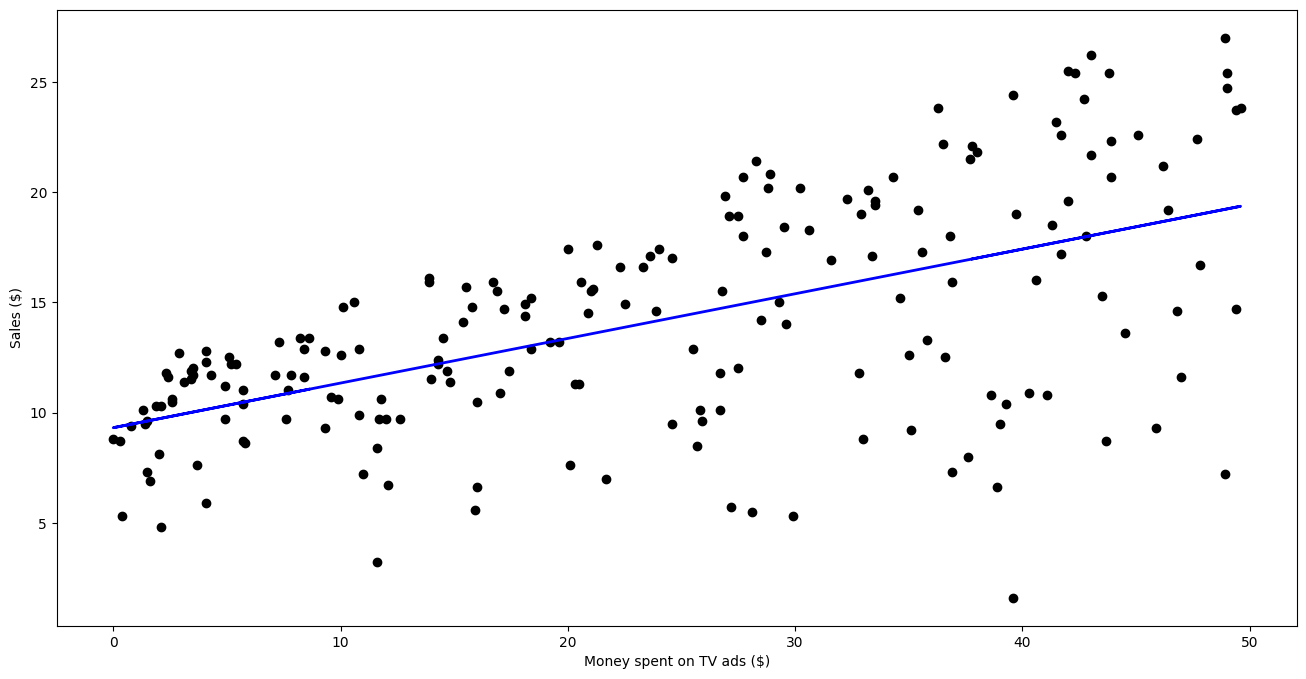

In [56]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['radio'],
    data['sales'],
    c='black'
)
plt.plot(
    data['radio'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [62]:
predicted = 0
real = 0
for i in range(data.shape[0]):
    #Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper
    predicted += abs(7.0326 + 0.047537*data['TV'][i])
    real += abs(data['sales'][i])
print(predicted - real)

0.011864500000228873


# Exercise

1) What is the error when the advertisment for TV is 286.0?

2) Find the total Error between Regression Line and data points.

3) What is Linear Regression Model for sales if we instead consider radio? What is the error when the advertisment for radio is 13.9? Find the total Error between Regression Line and data points?

4) What is Linear Regression Model for sales if we consider Newspapers? What is the error when the advertisment for newspaper is 3.7? Find the total Error between Regression Line and data points?

5) Discuss the results.

## Multivariate linear regression 

### Split data into inputs and labels

In [58]:
Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales'].values.reshape(-1,1)

### Perform linear regression

In [59]:
reg = LinearRegression()
reg.fit(Xs, y)
print(reg.coef_)
print(reg.intercept_)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]
The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


### Evaluate the model
#### Calculate the $R^2$ value

In [60]:
reg.score(Xs, y)

0.8972106381789522

### Calculate the error for each datapoint

In [61]:
y = data['sales']

a= reg.intercept_[0] + reg.coef_[0][0]*data['TV'] + reg.coef_[0][1]*data['radio'] + reg.coef_[0][2]*data['newspaper']

print("Actual",   "Predicted", "Error")
for i in range(0, 199):
    error= abs(y.values[i]- a[i])
    print(f'{y.values[i]:.3f}\t{a[i]:.3f}\t{error:.3f}')

Actual Predicted Error
22.100	20.524	1.576
10.400	12.338	1.938
9.300	12.308	3.008
18.500	17.598	0.902
12.900	13.189	0.289
7.200	12.478	5.278
11.800	11.730	0.070
13.200	12.123	1.077
4.800	3.727	1.073
10.600	12.551	1.951
8.600	7.032	1.568
17.400	17.285	0.115
9.200	10.577	1.377
9.700	8.826	0.874
19.000	18.434	0.566
22.400	20.819	1.581
12.500	12.824	0.324
24.400	23.225	1.175
11.300	9.952	1.348
14.600	14.166	0.434
18.000	18.101	0.101
12.500	14.741	2.241
5.600	6.489	0.889
15.500	16.546	1.046
9.700	8.147	1.553
12.000	15.610	3.610
15.000	14.990	0.010
15.900	17.052	1.152
18.900	19.411	0.511
10.500	9.144	1.356
21.400	21.634	0.234
11.900	11.346	0.554
9.600	7.639	1.961
17.400	18.864	1.464
9.500	7.575	1.925
12.800	17.007	4.207
25.400	23.406	1.994
14.700	15.623	0.923
10.100	9.909	0.191
21.500	20.448	1.052
16.600	16.378	0.222
17.100	17.296	0.196
20.700	21.596	0.896
12.900	13.964	1.064
8.500	8.888	0.388
14.900	15.162	0.262
10.600	8.873	1.727
23.200	21.723	1.477
14.800	16.264	1.464
9.700	8.168	1.532
11

# Exercise

1) What is the error when the advrtiesments for TV, Radio and Newspaper are 286.0	13.9	3.7, respectively?

2) Find the total error between Multiple Regression Model and data points? Compare the error results between linear regression and multivariate regression models.

3) Can you add one more advertisment to the data? If yes, then add one more advertisement type as a fourth input variable and each value should be generated randomly between 20 and 300. Apply multivariate regression model again.

4) Discuss the results.